In [ ]:
import pandas as pd
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split
from src.utils.utils import sentiment_postprocessor, sentiment_preprocessor
from torch.utils.data import DataLoader
from transformers import DataCollatorWithPadding

RANDOM_STATE = 42


def sentiment_preprocessor(label):
    if label == "positive":
        return "позитив"
    elif label == "neautral" or label == "neutral":
        return "нейтральность"
    elif label == "negative":
        return "негатив"

In [ ]:
ru_reviews_path = "data/ru-reviews/women-clothing-accessories.3-class.balanced.csv"
column_names = ["text", "label"]

ru_reviews = pd.read_csv(ru_reviews_path, sep="\t", names=column_names, skiprows=1)

In [ ]:
ru_reviews["label"] = ru_reviews["label"].apply(lambda x: "neutral" if x == "neautral" else x)
ru_reviews["text"] = ru_reviews["text"].apply(lambda x: x.replace("\n", " ").replace("\t", ""))

In [ ]:
pd.options.display.max_colwidth = 80

In [ ]:
ru_reviews.sample(3)

,text,label
1511,"может мне не повезло... но это платье носить не буду, очень плохое качество....",negative
55139,"заказала розовую и чёрную пижамы.К сожалению,от чёрной все простыни стали се...",neutral
61268,"Отличный джемпер. Швы ровные. Правда не бархатный на вид, как на фото, но то...",positive


In [ ]:
ru_reviews["Length words"] = ru_reviews["text"].apply(lambda x: len(x.split()))
ru_reviews["Length"] = ru_reviews["text"].apply(len)

In [ ]:
ru_reviews["Length words"].mean()

20.01108888888889

In [ ]:
ru_reviews["Length"].mean()

130.06925555555554

In [ ]:
ru_reviews.loc[5697]

text            Заказ не пришёл, УРОДЫ!!!!!
label                               негатив
Length words                              4
Length                                   27
Name: 5697, dtype: object

In [ ]:
ru_reviews["label"] = ru_reviews["label"].apply(sentiment_preprocessor)

In [ ]:
ru_reviews.groupby("label").sample(2)

,text,label,Length words,Length
5697,"Заказ не пришёл, УРОДЫ!!!!!",негатив,4,27
23253,"очень разочарована этим костюмом. продавец зачем то уточняет размер, обещает...",негатив,138,875
51223,"РУБАШКА СШИТА МЕШКОВАТО,МАТЕРИАЛ СУХОЙ,ЖЕСТКИЙ, 5 XL НЕ СООТВЕТСТУЕТ 54 ...",нейтральность,38,263
37578,"Пришла за 14 дней, но некоторых заклепок нету, и один из замков вставлен не ...",нейтральность,16,87
85782,Все отлично. Рисунок чуть темнее чем на картинке. Качество супер!,позитив,10,65
89315,"Джинсы супер, уже 3тий раз заказываю у этого продовца, мне они очень нравитс...",позитив,40,232


<AxesSubplot: xlabel='Количество элементов', ylabel='Класс'>

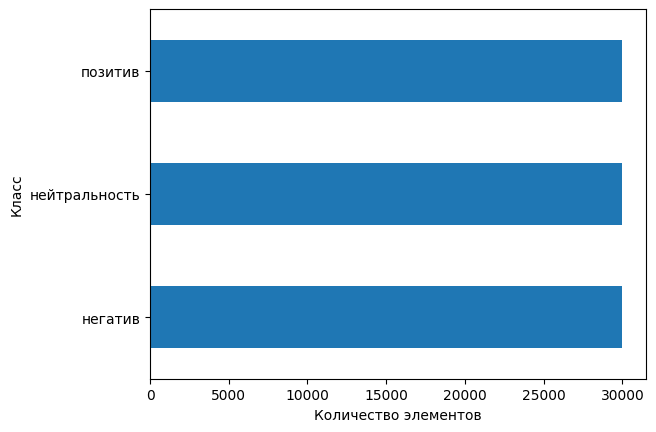

In [ ]:
ru_reviews["label"].value_counts().plot.barh(xlabel="Количество элементов", ylabel="Класс")

In [ ]:
size = ru_reviews.shape[0]
val_test_size = int(size * 0.1)

ru_reviews_train_val, ru_reviews_test = train_test_split(
    ru_reviews, test_size=val_test_size, shuffle=True, random_state=RANDOM_STATE
)

ru_reviews_train, ru_reviews_val = train_test_split(
    ru_reviews_train_val,
    test_size=val_test_size,
    shuffle=True,
    random_state=RANDOM_STATE,
)

print(
    f"Loaded RuReviews: train {ru_reviews_train.shape[0]},",
    f"val {ru_reviews_val.shape[0]},",
    f"test {ru_reviews_test.shape[0]}",
)

Loaded RuReviews: train 72000, val 9000, test 9000
